# SLC Case Study


### DATA DESCRIPTION: 

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. 

 RowNumber: Row Numbers from 1 to 10000 

 CustomerId: Unique Ids for bank customer identification 

 Surname: Customer's last name 

 CreditScore: Credit score of the customer 

 Geography: The country from which the customer belongs 

 Gender: Male or Female 

 Age: Age of the customer 

 Tenure: Number of years for which the customer has been with the bank 

 Balance: Bank balance of the customer 

 NumOfProducts: Number of bank products the customer is utilising 

 HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not 


 IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not 

 EstimatedSalary: Estimated salary of the customer in Dollars 

 Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained 

 > Target Column Description: Exited is a class label used to divide into groups (customer closed account or not). 
 

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
import csv

df=pd.read_csv("Churn_Modelling (1).csv")

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.	Summarize important observations from the data set 



a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [49]:
#a)
df.shape
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])


Number of rows: 10000
Number of columns: 14


In [50]:
# Types of Variables: int,float,object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [51]:
#b) 5 point summary for num columns:
df_num= df.select_dtypes(include="number")
# Dropping the binary classes encoded in 0 and 1
df_num= df_num.drop(["RowNumber","Exited","HasCrCard","IsActiveMember"],axis=1)

Q1= df_num.quantile(0.25)
Q2= df_num.quantile(0.50)
Q3= df_num.quantile(0.75)
min_num= df_num.min()
max_num= df_num.max()

In [52]:
#c)
# Converting Binary classes into object which were dropped above:
df["Exited"]= df["Exited"].astype("object")
df["HasCrCard"]= df["HasCrCard"].astype("object")
df["IsActiveMember"]= df["IsActiveMember"].astype("object")
df_cat= df.select_dtypes(exclude="number")
sur= df_cat["Surname"].value_counts(normalize= True)
geo= df_cat["Geography"].value_counts(normalize= True)
gen= df_cat["Gender"].value_counts(normalize= True)
has_card= df_cat["HasCrCard"].value_counts(normalize= True)
is_Active= df_cat["IsActiveMember"].value_counts(normalize= True)
exited= df_cat["Exited"].value_counts(normalize= True)


### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects 



a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [53]:
# a)
df.isnull().sum()
# Data has no missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

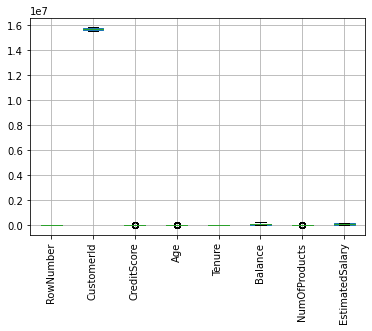

In [54]:
#b) Outliers Treatment:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

# From the boxplot we can observe that there are no outliers as such, with this credit score is quiet low, so reoval of outliers
#might affect the prediction of target columns which is exited

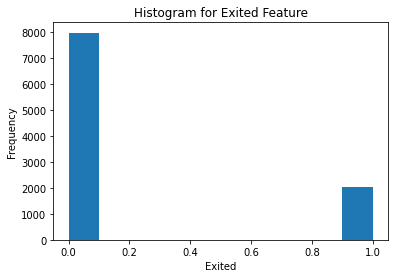

In [55]:
#c) 
plt.hist(df["Exited"])
plt.xlabel("Exited")
plt.ylabel("Frequency")
plt.title("Histogram for Exited Feature")
plt.show()

#### Inference:
* From above plot we can observe that the target variable Exited is not evenly distributed. As the count for 0 class is much more than class 1.

* One of the technique to deal with imbalanced dataset is SMOTE to make the data balanced, but undersampling or oversampling the datapoints is not always adviseable. Thus as per the business requirement to find which customers were retained and which not we wont be applying any Balancing Technique, rather would check the Confusion Matrix in order to get an idea about False Positives and False Negatives.


### 4.	Summarize relationships among variables              
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.




In [56]:
# Dropping RowNumber & Surname from df, as it wont be required for the analysis
df= df.drop(["RowNumber","Surname"],axis=1)

# Before proceeding further, we would convert the categorical columns in dummies and would scale the numerical data for
# better iferences about the variables.

In [57]:
# Creating Dummies
df_categ= df.select_dtypes(exclude="number")
df_categ.drop("Exited",axis=1,inplace= True)
df_dummy= pd.get_dummies(df_categ,drop_first= True).reset_index(drop=True)

C:\Users\Taarey\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
# Scaling the Numerical Features:
from sklearn.preprocessing import StandardScaler
df_nume= df.select_dtypes(include="number")
X_scaler= StandardScaler()
num_scaled= X_scaler.fit_transform(df_nume)
df_num_scaled= pd.DataFrame(num_scaled,columns= df_nume.columns).reset_index(drop=True)
Exited= pd.DataFrame(df["Exited"]).reset_index(drop=True)

In [59]:
# Concatenating both dummy and scaled dataset:
df_final= pd.concat([df_num_scaled,df_dummy,Exited],axis=1)
df_final.shape

(10000, 13)

### a) 

<AxesSubplot:xlabel='Gender', ylabel='Exited'>

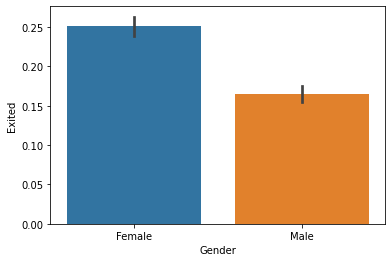

In [60]:
sns.barplot(x= df["Gender"],y= df["Exited"])

# More females are quitting bank than males

<AxesSubplot:xlabel='IsActiveMember', ylabel='Exited'>

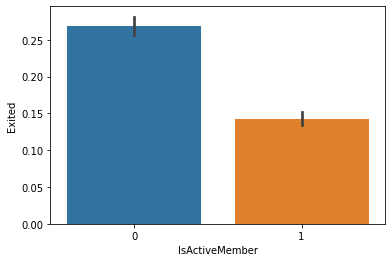

In [61]:
sns.barplot(x= df["IsActiveMember"],y= df["Exited"])

# Class 0 for is active member are leaving the bank more in comparison to class 1

<AxesSubplot:xlabel='HasCrCard', ylabel='Exited'>

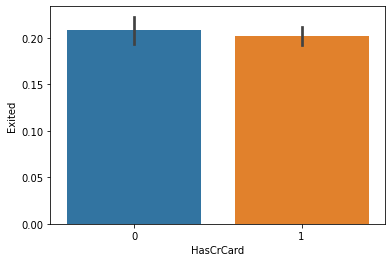

In [62]:
sns.barplot(x= df["HasCrCard"],y= df["Exited"])

# For both classes the difference is not same.

In [63]:
# Testing some categorical features such as gender and tarhet feature:
# Test to be performed : 2-Sample Proportion test
#H0: Proportion of males leaving = Proportion of females leaving
# Ha: Proportion of males leaving != Proportion of females leaving
pd.crosstab(df["Exited"],df["Gender"])

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


In [64]:
from statsmodels.stats.proportion import proportions_ztest
x= np.array([1139,898])
n= np.array([4543,5457])
proportions_ztest(x,n)

(10.651248767347461, 1.720414987484119e-26)

#### Inference:
* Since pval<0.05, thus we reject Null Hypothesis and accept Alternate which says that Proportion of males leaving  is not same as Proportion of females leaving. Thus we can conclude that Gender is the significant feature in predicting the Target Column

In [65]:
df_final.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1,Exited
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,0,0,0,1,1,1
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,1,0,0,1,0
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,0,0,0,1,0,1
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,0,0,0,0
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,1,0,1,1,0


C:\Users\Taarey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Taarey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Taarey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Taarey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


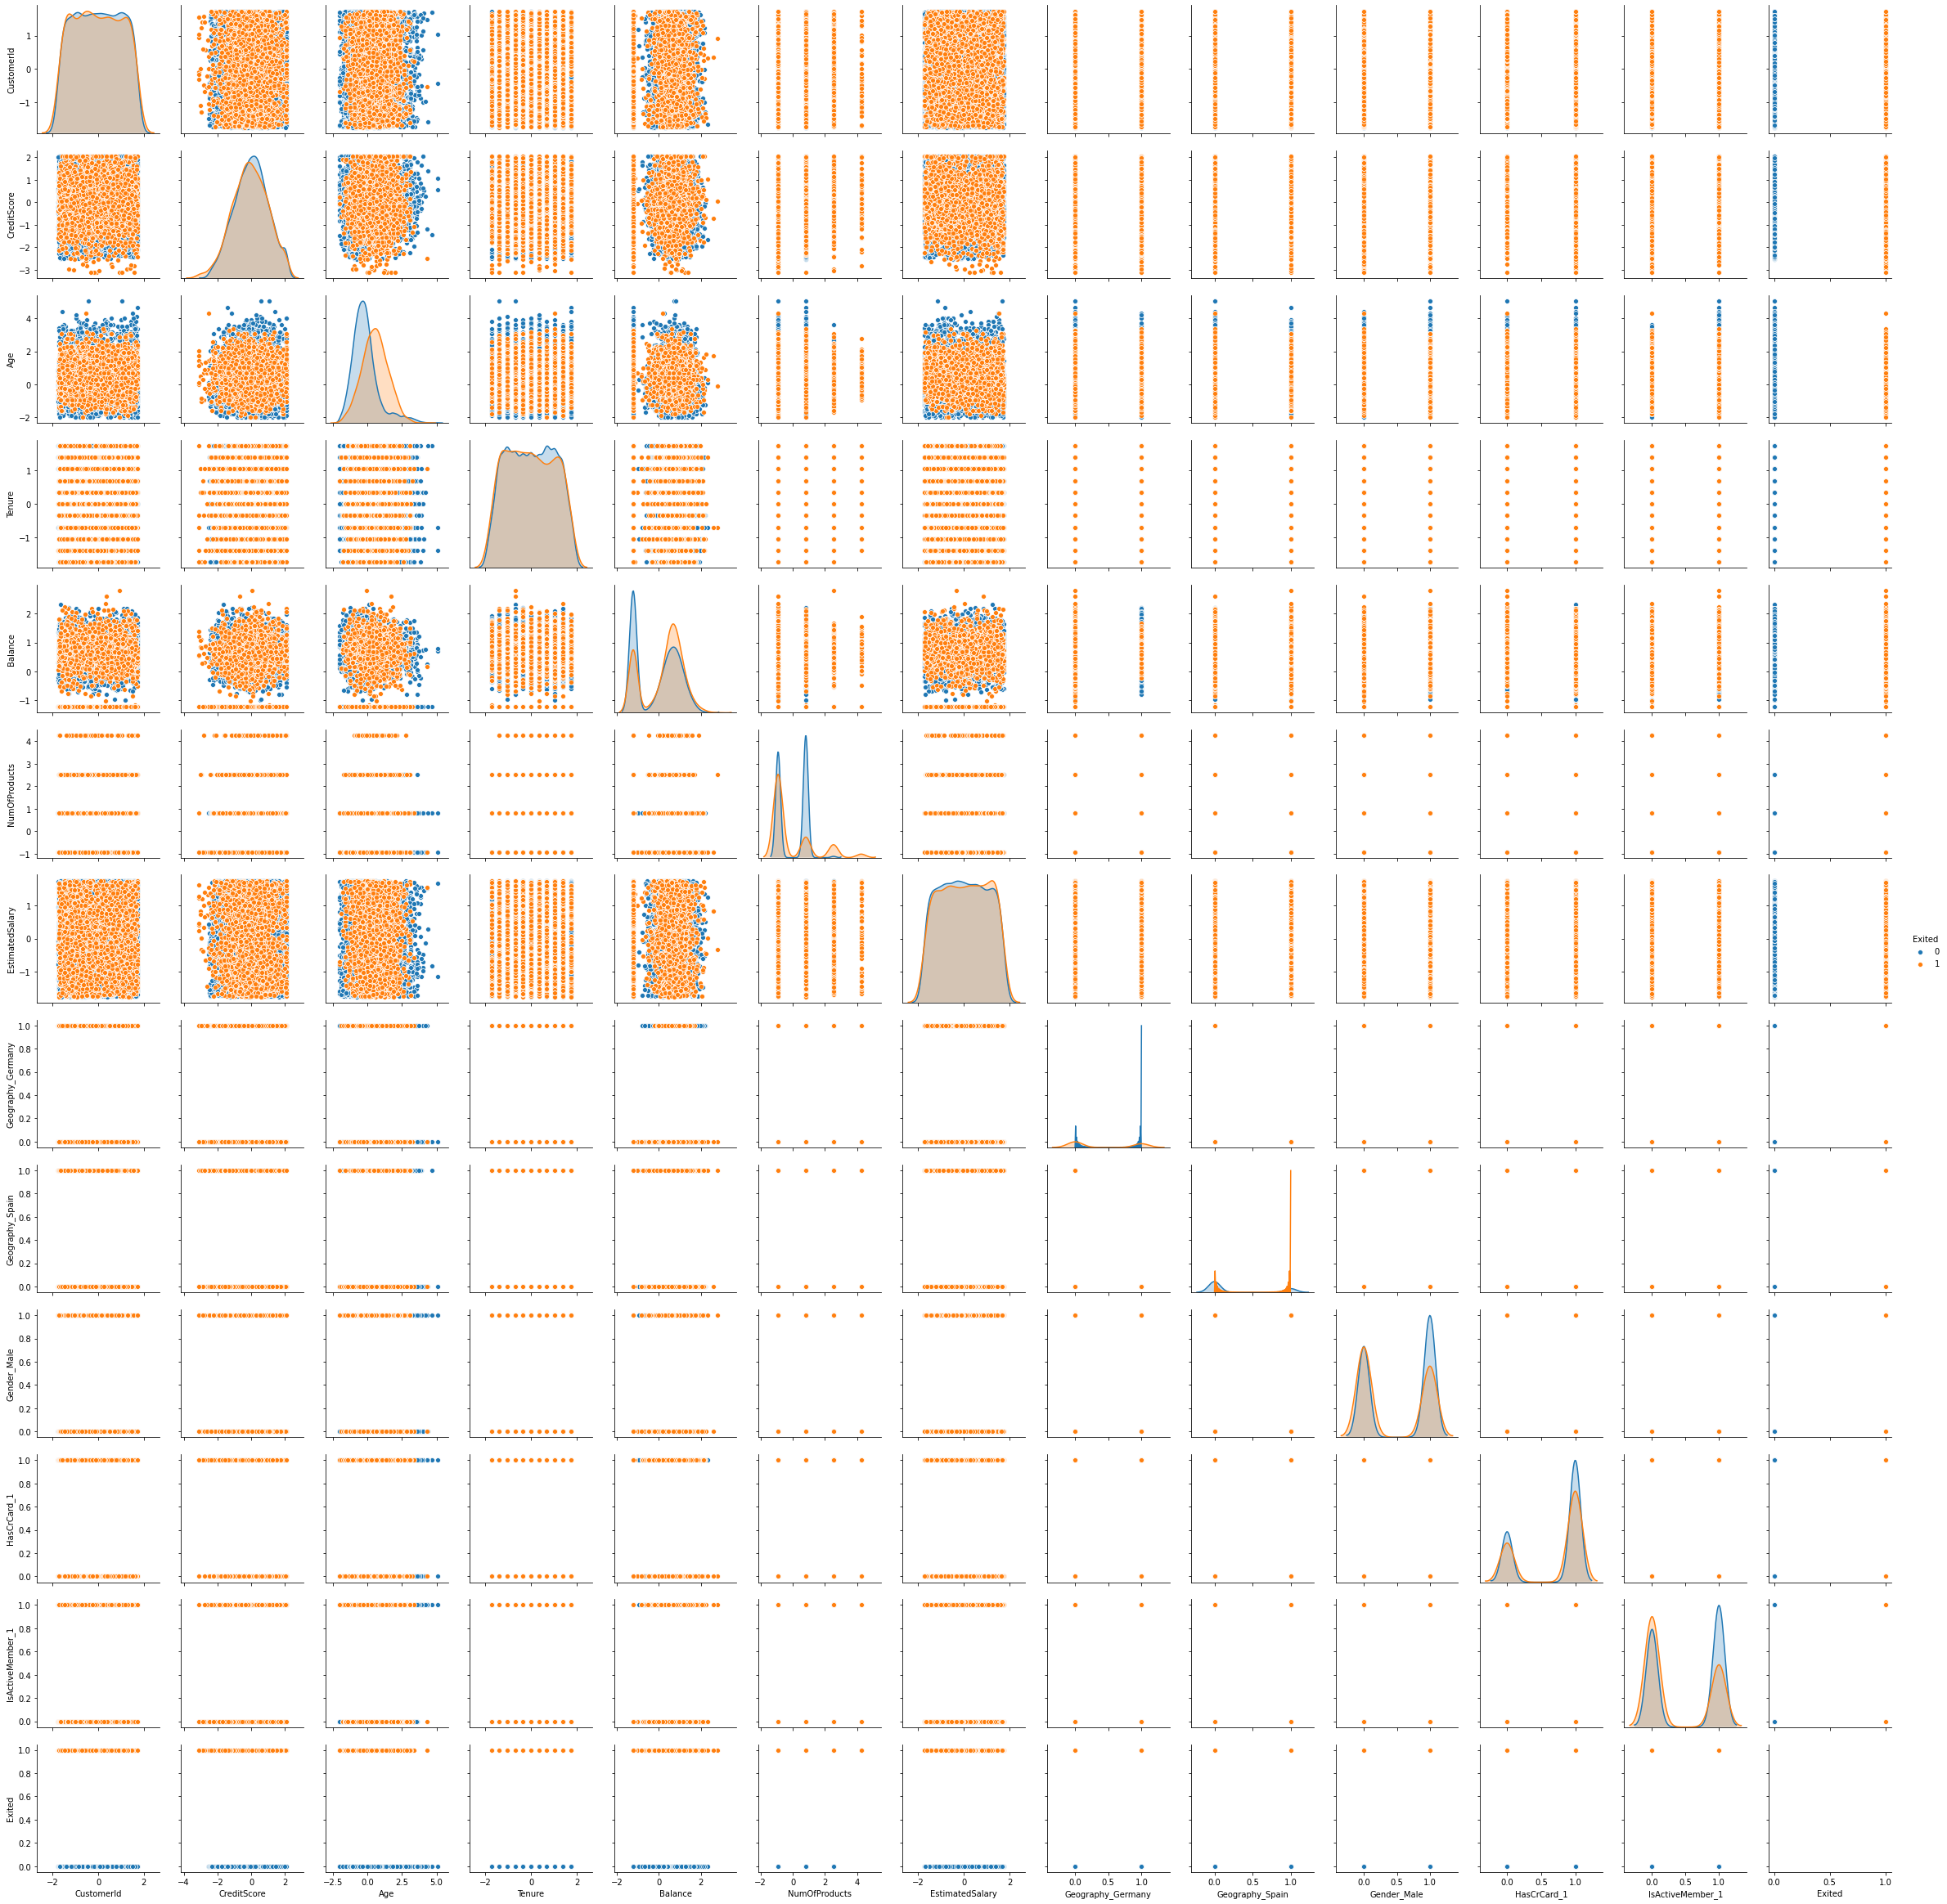

In [20]:
#b) 
sns.pairplot(df_final,diag_kind="kde",hue="Exited")



#### Observation:

* From the pairplot we can see that:
* Features such as Age, Balance, Number of products are still able to bifurcate the target column which is 'exited'. Based on this we can say that these are some few variables which are important to predict target Column.

In [66]:
# Statistical test b/w Age and Target Feature
# Test to be performed: 2-Sample test- Unpaired and Parametric(Assuming data to be normal after scaling)
# H0: Age for customers leaving= Age for customers retained
# Ha: Age for customers leaving != Age for customers retained
gb= df_final.groupby("Exited")
yes= gb.get_group(1) 
no= gb.get_group(0) 
from scipy.stats import ttest_ind
ttest_ind(yes["Age"],no["Age"])



Ttest_indResult(statistic=29.766814994370762, pvalue=1.2399313093429853e-186)

#### Inference:
* Since pval<0.05, thus we reject Null Hypothesis and accept Alternate which says that age of customers for both groups are different. Thus we can conclude that Age is the significant feature in predicting the Target Column

In [67]:
# Statistical test b/w Balance and Target Feature
# Test to be performed: 2-Sample test- Unpaired and Parametric(Assuming data to be normal after scaling)
# H0: Balance for customers leaving= balance for customers retained
# Ha: Balance for customers leaving != Balance for customers retained
gb= df_final.groupby("Exited")
yes= gb.get_group(1) 
no= gb.get_group(0) 
from scipy.stats import ttest_ind
ttest_ind(yes["Balance"],no["Balance"])



Ttest_indResult(statistic=11.936240300013841, pvalue=1.2755633191525477e-32)

#### Inference:
* Since pval<0.05, thus we reject Null Hypothesis and accept Alternate which says that balance of customers for both groups are different. Thus we can conclude that balance is the significant feature in predicting the Target Column

In [68]:
# Statistical test b/w Number of products and Target Feature
# Test to be performed: 2-Sample test- Unpaired and Parametric(Assuming data to be normal after scaling)
# H0: numofproducts for customers leaving= numofproducts for customers retained
# Ha: numofproducts for customers leaving != numofproducts for customers retained
gb= df_final.groupby("Exited")
yes= gb.get_group(1) 
no= gb.get_group(0) 
from scipy.stats import ttest_ind
ttest_ind(yes["NumOfProducts"],no["NumOfProducts"])



Ttest_indResult(statistic=-4.7869846984231, pvalue=1.7173330048042325e-06)

#### Inference:
* Since pval<0.05, thus we reject Null Hypothesis and accept Alternate which says that Number of products of customers for both groups are different. Thus we can conclude that Number of products is the significant feature in predicting the Target Column

### 5.	Split dataset into train and test (70:30) 
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [69]:
X= df_final.drop("Exited",axis=1)
Y= df_final["Exited"].astype("int")
from sklearn.model_selection import train_test_split

In [70]:
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,random_state=20,test_size=0.30)

In [71]:
# Statistically proving that:
# H0: Sample represent population
# Ha: Sample doent represent population

from scipy .stats import ttest_1samp
ttest_1samp(xtrain["Balance"],df_final["Balance"].mean())

Ttest_1sampResult(statistic=-0.6665514123605049, pvalue=0.5050806841698718)

In [72]:
# Statistically proving that:
# H0: Sample represent population
# Ha: Sample doent represent population

from scipy .stats import ttest_1samp
ttest_1samp(xtest["Balance"],df_final["Balance"].mean())

Ttest_1sampResult(statistic=1.0235412192143278, pvalue=0.30613457446629794)

#### Inference:
* We can conclude that for both xtrain and xtest pval>0.05 Thus we accept null hypothesis which says that sample represent Population

### 6.	Fit a base model and explain the reason of selecting that model. Please write your key observations 

a.	What is the overall Accuracy? Please comment on whether it is good or not. 

b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

c.	Which variables are significant?

d.	What is Cohen’s Kappa Value and what inference do you make from the model
e.	Which other key model output parameters do you want to look at? 


### Base Model: Logistic regression
#### Reson to select: 

* It is easier to implement ,interpret and very effecient to train.
* It is very fast at classifying unknown records
* For a base model Logistioc regression will help us to get an idea about the accuracy score, noting which we can further try to improve the scores accordingly

In [73]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

In [74]:
LR.fit(xtrain,ytrain)

LogisticRegression()

In [75]:
print("Training Accuracy")
print(LR.score(xtrain,ytrain))
print("Testing Accuracy")
print(LR.score(xtest,ytest))



Training Accuracy
0.8102857142857143
Testing Accuracy
0.8163333333333334


#### Observation:

* For the base model we are getting Training Accuracy as 81% and testing Accuracy approx to 82%, we can improve the score by building different models further and can improve the accuracy score. As of now there is no much difference in both training and testing accuracy

In [76]:
ypred= LR.predict(xtest)

In [77]:
#b) 
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[2331   92]
 [ 459  118]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2423
           1       0.56      0.20      0.30       577

    accuracy                           0.82      3000
   macro avg       0.70      0.58      0.60      3000
weighted avg       0.78      0.82      0.78      3000



#### Optimization Objective:

* As we know that data is quiet imbalanced, and relying on Accuracy Score will not give us best conclusions, so in order to deal with this imbalanced dataset we should also check other metrics such as precison, recall, f-score.

* For our dataset where we need to predict whether the customers are leaving or staying with the bank, False Negatives is more costlier because if in reality the customers are leaving the bank and model is predicting wrong ,saying that the bank is still able to retain their customers, this would be more costly for the banks as they are loosing their customers, so its very important to reduce the False Negatives as much as we can

* To reduce False Negatives, the target should be to maximize recall.

In [78]:
#c)
#Significant Variables:
coef= list(LR.coef_)
df= pd.DataFrame(xtrain.columns,coef)
df.rename({0:"Features"},axis=1)


,Features
-0.024183,CustomerId
-0.046700,CreditScore
0.799365,Age
-0.049613,Tenure
0.176503,Balance
-0.069440,NumOfProducts
0.003438,EstimatedSalary
0.724089,Geography_Germany
-0.023990,Geography_Spain
-0.464313,Gender_Male


#### Inference :
* From above we can conclude that higher the coffecient higher would be the importance of the feature as the likelihood of target feature will increase with an increase in 1 unit of the indep feature, by kepping others constant.
* age,geography_german,balance,gender_male,isactivemember1 are some of the most significant features.

In [79]:
#d)

from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(ytest,ypred)

# It is used to check the inter rater relaibility. 0.219 suggests that there is less aggrement between predicted value and actual value

0.21978986718019888

In [80]:
# #e) 
# Other Parameters:

confusion= (confusion_matrix(ytest,ypred))

TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

print("True Positive:",TP)
print("True Negative:",TN)
print("False Positive:",FP)
print("False Negative:",FN)


# Other metrics such as True Positive and True Negative, False Positive and False Negatives are printed below
#which are very import in order to get a clarity how much are correctly classified and how much are wrongly.

Specificity= TN/(TN+FP)
print("Value for Specificity:",Specificity)

# Specifity tells when actual value is negative, how often is prediction correct 

FPR= 1- Specificity
print('False Positve Rate:',FPR)
# It tells when actual value is neagtive, how often is prediction in correct.


# With this we need to check weighted f1 score which is 78%. Thus we would focus to increase this core as well

True Positive: 118
True Negative: 2331
False Positive: 92
False Negative: 459
Value for Specificity: 0.9620305406520842
False Positve Rate: 0.037969459347915846


### 7.	How do you improve overall efficiency of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. 



In [83]:
#Lets check f1-scoring for 3 models , for that we will do k-fold cross validation for all the 3 models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score,KFold
clf1= DecisionTreeClassifier(random_state= 10)
clf2= RandomForestClassifier(random_state= 10)
clf3= XGBClassifier(random_state= 10)

kf= KFold(n_splits=7,shuffle= True,random_state=10)

for i,j in zip([clf1,clf2,clf3],["DT","RF","XGB"]):
    score= cross_val_score(i,X,Y,cv=kf,scoring="f1")
    print(j,np.mean(score),np.std(score)/np.mean(score))

DT 0.4971496035347175 0.05555437180548497
RF 0.5731176188308876 0.04608657213499106
XGB 0.5705030245479266 0.03308459008085872


#### Inference:

* From above we can clearly observe that the best Bias Accuracy and Variance Error Trade off is for XGB Classifier. Thus we wll be selecting XGB Classifier for improving the base model, and then will compare the results for both.

* Next step would be to tune the parameters for XGB Classifier, using Grid Search CV

In [85]:
# Loop to get best n_estimators:
ba=[]
ve=[]
kf= KFold(n_splits=7,shuffle= True,random_state=10)
for i in [5,10,20,40,60,80,120,150,200,300,400,500]:
    XGB= XGBClassifier(n_estimators=i,random_state=10)
    score= cross_val_score(XGB,X,Y,cv=kf,scoring="f1")
    print('n_estimator:',i)
    print("Biass Accuracy:",np.mean(score))
    print("Variance error:",np.std(score)/np.mean(score))
    ba.append(np.mean(score))
    ve.append(np.std(score)/np.mean(score))

n_estimator: 5
Biass Accuracy: 0.5617590126097475
Variance error: 0.05790096003037956
n_estimator: 10
Biass Accuracy: 0.5689393545562912
Variance error: 0.04332784756707338
n_estimator: 20
Biass Accuracy: 0.5853239523485435
Variance error: 0.05134040582370768
n_estimator: 40
Biass Accuracy: 0.5773834832526799
Variance error: 0.031076667733789757
n_estimator: 60
Biass Accuracy: 0.5777282833195827
Variance error: 0.041982099287877654
n_estimator: 80
Biass Accuracy: 0.5765553576365713
Variance error: 0.03835562463021095
n_estimator: 120
Biass Accuracy: 0.5698642803391801
Variance error: 0.028195434946368624
n_estimator: 150
Biass Accuracy: 0.5670160108901113
Variance error: 0.04478419099113985
n_estimator: 200
Biass Accuracy: 0.5628529913255631
Variance error: 0.03588345466905827
n_estimator: 300
Biass Accuracy: 0.5598839724002095
Variance error: 0.03810476857102274
n_estimator: 400
Biass Accuracy: 0.5522709706346189
Variance error: 0.03780359121555774
n_estimator: 500
Biass Accuracy: 0.5

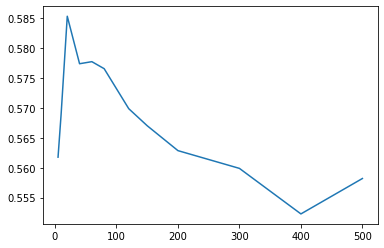

In [86]:
plt.plot([5,10,20,40,60,80,120,150,200,300,400,500],ba)

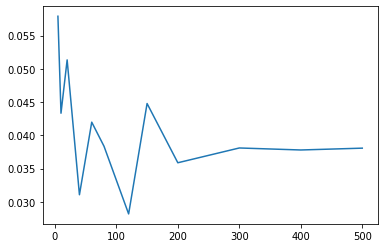

In [87]:
plt.plot([5,10,20,40,60,80,120,150,200,300,400,500],ve)

In [ ]:
# From above we can see that n-estimator as 120 gives the best BA and VE Trade Off

In [89]:
# Grid Search CV For XGB Classifier:
from sklearn.model_selection import GridSearchCV
kf= KFold(n_splits=7,shuffle= True,random_state=10)
XGB= XGBClassifier()
parameters= {"n_estimators":[120],
            "max_depth":[10,15,20,25,30,35],
            "learning_rate":[0.01,0.1,1,10,100]}

cv= GridSearchCV(XGB,parameters,cv=kf)
cv.fit(X,Y)
print(f"Best Score is: {cv.best_score_} with parameters:{cv.best_params_}")



Best Score is: 0.8536000824402538 with parameters:{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 120}


In [90]:
res= pd.DataFrame(cv.cv_results_)

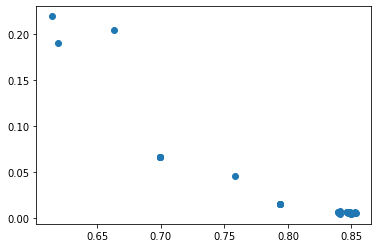

In [91]:
plt.scatter(res["mean_test_score"],res["std_test_score"])
plt.show()

In [102]:
res[(res['mean_test_score']>0.85) & (res["std_test_score"]>0.001)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,1.590945,0.187834,0.013737,0.002992,0.01,10,120,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.841148,0.854444,0.851645,0.857243,0.852941,0.858543,0.852941,0.852701,0.005244,2
6,1.890305,0.914187,0.016011,0.004915,0.1,10,120,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.842547,0.854444,0.860042,0.856543,0.855042,0.856443,0.850140,0.853600,0.005280,1
7,2.254195,0.244739,0.018857,0.004151,0.1,15,120,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.839748,0.848845,0.855143,0.855143,0.852241,0.853641,0.852241,0.851001,0.005009,4
8,2.415047,0.185466,0.019143,0.006734,0.1,20,120,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",0.842547,0.846046,0.860042,0.850245,0.851541,0.862045,0.855042,0.852501,0.006559,3
10,2.911523,0.822285,0.021318,0.006213,0.1,30,120,"{'learning_rate': 0.1, 'max_depth': 30, 'n_est...",0.841847,0.846746,0.855843,0.851645,0.846639,0.854342,0.852941,0.850000,0.004671,5


In [106]:
# Building the Final Model with the parametrs we get:
XGB_final= XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators=120,random_state=10)
XGB_final.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=0, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_pred_XGB= XGB_final.predict(xtest)

In [109]:
print("Training Accuracy")
print(XGB_final.score(xtrain,ytrain))
print("Testing Accuracy")
print(XGB_final.score(xtest,ytest))



Training Accuracy
0.9955714285714286
Testing Accuracy
0.861


#### Conclusion:

* We can observe that both the training and testing accuracy has been improved from base model.
* Training Accuracy has increased to 99%, and testing accuracy has increased to 86%.

### 8.	Summarize as follows 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

3.	What changes from the base model had the most effect on model performance?

4.	What are the key risks to your results and interpretation?


#### a) Observation: 
* From above XGB Classifier, after the Hyper Parameter Tuning we can observe that the accuracy score has improved from the base model significantly, we will have a quick look at the Confusion matrix and Classification report as well to compare the results from base model.

In [110]:
# Printing all the scoring Metrics for XGB Claasifier- Final Model
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score

print(confusion_matrix(ytest,y_pred_XGB))
print(classification_report(ytest,y_pred_XGB))

print("Accuracy:",XGB_final.score(xtest,ytest))
print("F1:",f1_score(ytest,y_pred_XGB))
print("Recall:",recall_score(ytest,y_pred_XGB))
print("Precision:",precision_score(ytest,y_pred_XGB))

[[2310  113]
 [ 304  273]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2423
           1       0.71      0.47      0.57       577

    accuracy                           0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

Accuracy: 0.861
F1: 0.5669781931464175
Recall: 0.4731369150779896
Precision: 0.7072538860103627


In [111]:
# Printing all the scoring Metrics for LR- Base Model
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score

print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

print("Accuracy:",LR.score(xtest,ytest))
print("F1:",f1_score(ytest,ypred))
print("Recall:",recall_score(ytest,ypred))
print("Precision:",precision_score(ytest,ypred))

[[2331   92]
 [ 459  118]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2423
           1       0.56      0.20      0.30       577

    accuracy                           0.82      3000
   macro avg       0.70      0.58      0.60      3000
weighted avg       0.78      0.82      0.78      3000

Accuracy: 0.8163333333333334
F1: 0.2998729351969504
Recall: 0.2045060658578856
Precision: 0.5619047619047619


#### Final Conclusion:

* From above reults we can clearly observe that not only Accuracy score, but with that weighted F1-Score, Recall Score everything has been improved significantly.

* As mentioned earlier, our objective is to maximize recall and reduce the number of False Negatives as much as we can,thus we were very well able to achieve the same. The False Negatives for the XGB model is 304 where as for base model it was  459. Thus we can conclude that the model has improved significantly.


#### b) Business Interpretation:

* From the Banking point of view the bank would like to retain their customers as much as they can. So there focus would be
to correctly identify True negatives and True Positives, in other words they will target to correctly identify the customers who are leaving and who are retained.

* Another important thing to be keep in mind would be the cost, that means the banking institution cant afford to wrongly predict the customers who have left the banks. In this case if the customers have left their bank actually, but the model is saying its not, then this would be very costliers for banks as they are under a wrong impression, that they have manged to retain their customers.

In [112]:
#b)
feat_imp= pd.DataFrame()
feat_imp["Feature"]= xtrain.columns
feat_imp["Importance"]= XGB_final.feature_importances_

feat_imp.sort_values("Importance",ascending= False)

,Feature,Importance
5,NumOfProducts,0.310074
11,IsActiveMember_1,0.211404
2,Age,0.110692
7,Geography_Germany,0.079460
4,Balance,0.048724
8,Geography_Spain,0.037591
9,Gender_Male,0.036160
6,EstimatedSalary,0.034359
1,CreditScore,0.033938
0,CustomerId,0.033829


#### Conclusion:

* From above table we can observe the most important features we got from XGB classifier, arranged in descending order.
* the Top 3 features are: Is_Active_member_1,Num of Products,Age

In [ ]:
## Pairplot using these 3 Top features and including the target variable

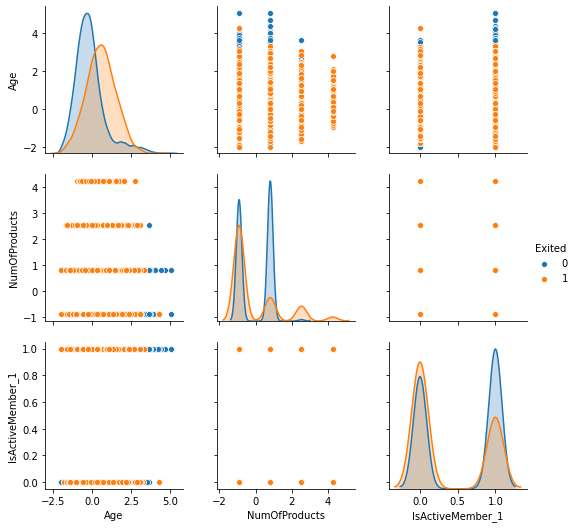

In [115]:
imp_features= df_final[["Age","NumOfProducts","IsActiveMember_1","Exited"]]
sns.pairplot(imp_features,hue= "Exited",vars= imp_features.iloc[:,0:3])

#### Observation:

* From pairplot we can observe that these 3 features are still able to differentiate the classes, where Age is able to bifurcate both the classes. Note that as per feature importance age was the third highest feature, whereas as per the pairplot "Age" is able to seperate clusters much better than Num of products and IsActiveMember_1

#### c) Significant Improvement

* The first significant improvemnt which we can observe from the base model is reduction in number of False Negatives. Keeping the objective in mind from business point of view, False Negatives are more costlier. Thus we were very well able toi achieve that objective.

* The second improvement which we can see is the recall score, as mentioned in first point, since False Negatives are most costlier, thus the target should be to increase the recall score. The recall score has been improved from 20% to 47%.

* From below cross val scores, we can observe that both Biass Accuracy and Variance Error Trade off has been improved in XGB Classiifer Model, in comparision to base model which is Logistic Regression.

#### Cross Val Score using K-Fold

In [118]:
# Cross Val for LR 
score_LR= cross_val_score(LR,X,Y,cv=kf,scoring="f1")
print("Biass Accuracy:",np.mean(score_LR))
print("Variance Error:",np.std(score_LR)/np.mean(score_LR))

Biass Accuracy: 0.3129462484525292
Variance Error: 0.09512490188471914


In [119]:
# Cross Val for XGB 
score_XGB= cross_val_score(XGB_final,X,Y,cv=kf,scoring="f1")
print("Biass Accuracy:",np.mean(score_XGB))
print("Variance Error:",np.std(score_XGB)/np.mean(score_XGB))

Biass Accuracy: 0.571285742289766
Variance Error: 0.045141264694966064


#### d) Key Risk Involved:

* Since we know that the data is quiet imbalanced, it has more data points for Class 0 rather than class 1. Thus the model is very well able to identify more number of True Negatives in comparision to True Positives which is Class1 of Target Variable. This can be solved using different Sampling Techniques such as SMOTE,nearmiss, but eveyrtime creating synthetised samples is not a solution. Thus we checked the weighted-f1 score to get a better picture.

* Due to this f1-score, recall and precsiion score for Class 0 is much better than class1.



0    7963
1    2037
Name: Exited, dtype: int64

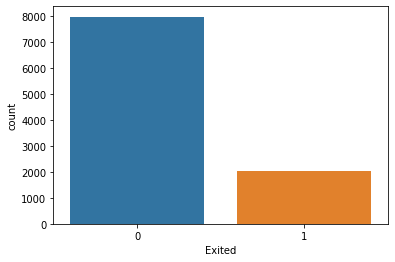

In [120]:
sns.countplot(df_final["Exited"])

df_final["Exited"].value_counts()

# We can observe that Class 0 has more observations in comparison to Class1 .